In [1]:
import cv2
import numpy as np
from IPython.display import Image

We first load the image which has been pre-processed manually to include only the iris and the pupil of the eye. 

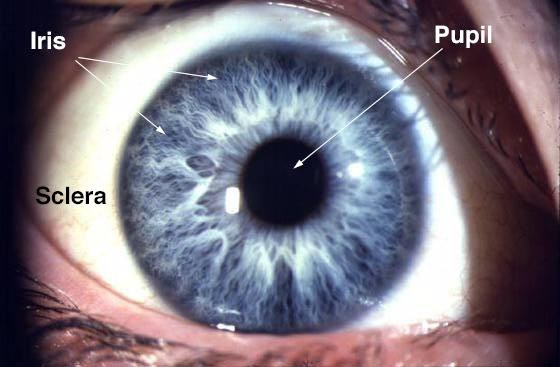

In [2]:
# Diagram showing what is meant by Iris and Pupil of the eye
Image(filename='pupil&iris.jpg')

In [28]:
# Load image
file_name = 'norm_eye4_circle'
image = cv2.imread(file_name+'.png')

Lets visualize the image now. 

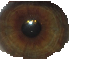

In [29]:
Image(filename=file_name+'.png')

Now we will need to detect the gray outer part of the iris i.e. we need to detect the gray color in the iris. We know each pixel is defined by its RGB values and that for the color gray R = 128, G= 128 and B = 128. So we go ahead and define our list of acceptable color ranges. 

In [5]:
boundaries = [([100, 100, 100], [175, 175, 175])]

Here we define a list which specifies a boundary in the RGB color space. The boundary is given by a tuple with two values: one list with lower limits and another list with upper limits. 

So we are defining our section of interest in the image as a part having R >= 100, B >= 100, and G >= 100 along with R <= 175, B <= 175, and G <= 175. We have taken this range after tuning this values from multiple images havig the gray part. 

After setting up our boundaries, we will now perform the actual color detection using cv2.inRange function.

In [30]:
# loop over the boundaries
for (lower, upper) in boundaries:
    # create NumPy arrays from the boundaries
    lower = np.array(lower, dtype = "uint8")
    upper = np.array(upper, dtype = "uint8")
 
    # find the colors within the specified boundaries and apply the mask
    mask = cv2.inRange(image, lower, upper)
    output = cv2.bitwise_and(image, image, mask = mask)
    
    # Calculate a flag to display a message whether disease is present or not 
    if sum(mask == 255).sum() > 1000:
        flag = 'YES'
    else:
        flag = 'NO'
    
    cv2.imwrite(file_name+'_output.png',np.hstack([image, output]))
    # show the images
    #cv2.startWindowThread()
    #cv2.imshow("Disease Present: %s" %(flag), np.hstack([image, output]))
    #cv2.waitKey(0)

We first convert the upper and lower limits to NumPy arrays as OpenCV expects these limits to be NumPy arrays. Furthermore, since these are pixel values that fall within the range [0, 256] we can use the unsigned 8-bit integer data type.

The actual color detection happens in cv2.inRange function. The cv2.inRange  function expects three arguments: the first is the image  were we are going to perform color detection, the second is the lower  limit of the color we want to detect, and the third argument is the upper  limit of the color we want to detect.

After calling cv2.inRange, a binary mask is returned, where white pixels (255) represent pixels that fall into the upper and lower limit range and black pixels (0) do not.

To create the output image, we apply our mask by simply making a call to cv2.bitwise_and, showing only pixels in the image that have a corresponding white (255) value in the mask.

Further through repeated tuning, we have found that images whose sum of all the mask values detected as white are more than 1000, can safely be considered to be images having the gray part and others as normal. Hence we use this fact to label an image as disease present or not. 

The output is as follows.

Disease Present: NO


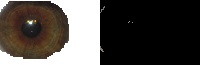

In [31]:
print("Disease Present: %s" %(flag))
Image(filename=file_name+'_output.png')

There are certain limitations of our process:
- We need pic of only iris and pupil of the eye, so if thats not the case then we need to do some pre-processing manually by cropping the image. 
- The model most likely will not work when there is reflection in eye